# **Fitness & Lifestyle Prediction Model**


In [1]:
!pip install streamlit
!npm install -g localtunnel


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 76.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 98.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 8.1 MB/s eta 0:00:00
⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦
added 22 packages in 3s
⠦
⠦3 packages are looking for funding
⠦  run `npm fund` for details
⠦

In [2]:
!pip install pandas numpy matplotlib seaborn scikit-learn


   phy_fitness    diet_pref       act_level  sleep_hrs  mindfulness  \
0          3.0        Vegan       Sedentary          7           10   
1          4.0        Vegan  Lightly Active          7            1   
2          8.0   Vegetarian          Active          8           10   
3          2.0  Pescatarian       Sedentary          8            7   
4          9.0  Pescatarian   Highly Active          5            7   

       career  gender  daily_avg_steps  daily_avg_calories  is_healthy  
0      Artist     1.0           2020.0              1831.0           0  
1     Teacher     0.0           5154.0              2190.0           0  
2  Freelancer     1.0          12363.0              2297.0           1  
3      Doctor     0.0           1664.0              1943.0           0  
4    Business     0.0          17680.0              3527.0           1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 10 columns):
 #   Column              Non

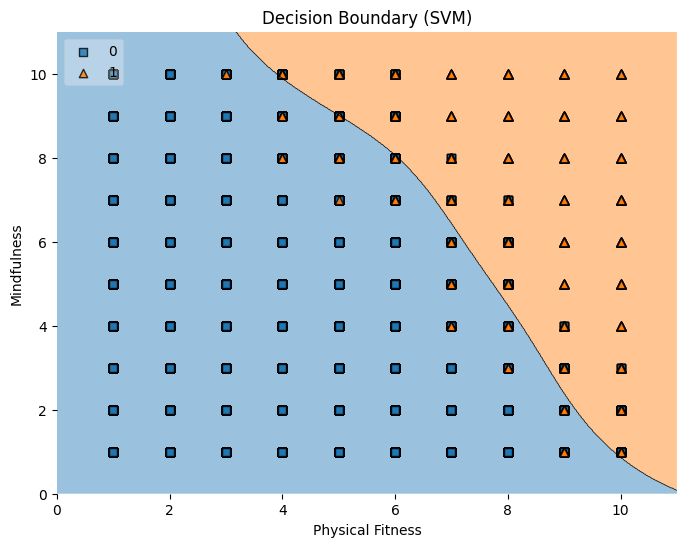

In [3]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_decision_regions

# Load the dataset
df = pd.read_csv("dataset.csv")  # Update with actual dataset filename

# Display basic dataset info
print(df.head())
print(df.info())

# Handle missing values (if any)
df.dropna(inplace=True)

# Feature selection - Extract relevant columns, excluding 'career'
X = df[['phy_fitness', 'mindfulness']]  # Excluding 'career' column

# Alternatively, you can check if the columns exist and handle them accordingly:
# desired_columns = ['phy_fitness', 'mindfulness', 'diet_preferences', 'activity_level', 'sleep_habits']  # Excluding 'career'
# existing_columns = [col for col in desired_columns if col in df.columns]
# X = df[existing_columns]

# Continue with the rest of your code...
y = df['is_healthy']
# ...

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features (important for SVM)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the SVM model
svm_model = SVC(kernel='rbf', C=1.0)
svm_model.fit(X_train, y_train)

# Train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
svm_preds = svm_model.predict(X_test)
rf_preds = rf_model.predict(X_test)

# Evaluate accuracy
svm_acc = accuracy_score(y_test, svm_preds)
rf_acc = accuracy_score(y_test, rf_preds)

print(f"SVM Accuracy: {svm_acc:.4f}")
print(f"Random Forest Accuracy: {rf_acc:.4f}")

# Decision boundary visualization (phy_fitness vs. mindfulness)
def plot_decision_boundary(model, X, y, title):
    plt.figure(figsize=(8,6))
    plot_decision_regions(X, y.to_numpy(), clf=model, legend=2)
    plt.xlabel("Physical Fitness")
    plt.ylabel("Mindfulness")
    plt.title(title)
    plt.show()

# Reduce features to two for plotting decision boundary
X_vis = df[['phy_fitness', 'mindfulness']].to_numpy()
y_vis = df['is_healthy']

# Train a new SVM model for visualization
svm_vis = SVC(kernel='rbf', C=1.0)
svm_vis.fit(X_vis, y_vis)

# Plot decision boundary
plot_decision_boundary(svm_vis, X_vis, y_vis, "Decision Boundary (SVM)")

   phy_fitness    diet_pref       act_level  sleep_hrs  mindfulness  \
0          3.0        Vegan       Sedentary          7           10   
1          4.0        Vegan  Lightly Active          7            1   
2          8.0   Vegetarian          Active          8           10   
3          2.0  Pescatarian       Sedentary          8            7   
4          9.0  Pescatarian   Highly Active          5            7   

       career  gender  daily_avg_steps  daily_avg_calories  is_healthy  
0      Artist     1.0           2020.0              1831.0           0  
1     Teacher     0.0           5154.0              2190.0           0  
2  Freelancer     1.0          12363.0              2297.0           1  
3      Doctor     0.0           1664.0              1943.0           0  
4    Business     0.0          17680.0              3527.0           1  
phy_fitness            3
diet_pref              4
act_level              6
sleep_hrs              0
mindfulness            0
career    

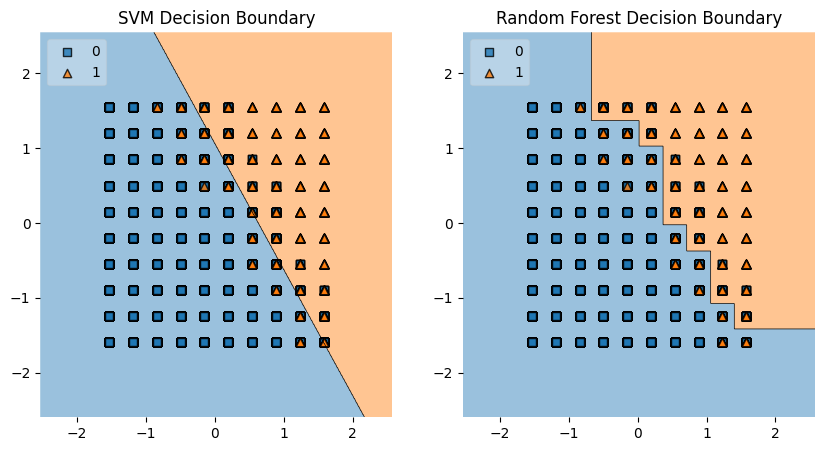

In [4]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from mlxtend.plotting import plot_decision_regions

# Load dataset (Replace 'fitness_data.csv' with actual dataset path)
df = pd.read_csv("dataset.csv")  # Update with actual dataset filename
# Display first few rows
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Splitting features and target variable
X = df[['phy_fitness', 'mindfulness']]  # Features for decision boundary
y = df['is_healthy']  # Target variable (1 = Healthy, 0 = Unhealthy)

# Splitting dataset into training & test sets (80%-20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert X_train and X_test back to DataFrames to use dropna
X_train = pd.DataFrame(X_train, columns=['phy_fitness', 'mindfulness'], index=y_train.index) # keep original index
X_test = pd.DataFrame(X_test, columns=['phy_fitness', 'mindfulness'], index=y_test.index) # keep original index

# Handle missing values (if any) introduced during scaling
X_train.dropna(inplace=True)
X_test.dropna(inplace=True)

# Adjust y_train and y_test accordingly after dropping rows in X_train and X_test
y_train = y_train[X_train.index] # Now, indices should match
y_test = y_test[X_test.index] # Now, indices should match


# Convert back to numpy arrays for model training
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()

# Train SVM model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
svm_preds = svm_model.predict(X_test)
rf_preds = rf_model.predict(X_test)

# Accuracy
svm_acc = accuracy_score(y_test, svm_preds)
rf_acc = accuracy_score(y_test, rf_preds)

print(f'SVM Accuracy: {svm_acc:.2f}')
print(f'Random Forest Accuracy: {rf_acc:.2f}')

# Classification Report
print("SVM Classification Report:\n", classification_report(y_test, svm_preds))
print("Random Forest Classification Report:\n", classification_report(y_test, rf_preds))

# Plot decision boundary
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plot_decision_regions(X_train, y_train.to_numpy(), clf=svm_model, legend=2)
plt.title("SVM Decision Boundary")

plt.subplot(1, 2, 2)
plot_decision_regions(X_train, y_train.to_numpy(), clf=rf_model, legend=2)
plt.title("Random Forest Decision Boundary")

plt.show()

**1. Scatter Plot (Before Training)**
To understand the dataset distribution before training:

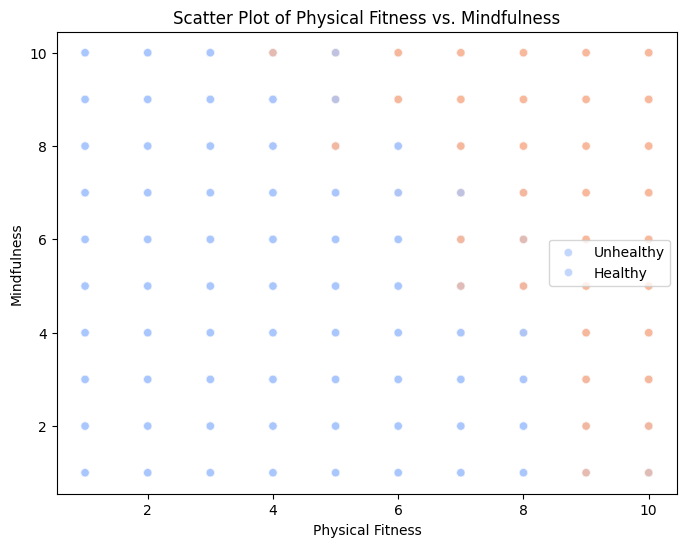

In [5]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['phy_fitness'], y=df['mindfulness'], hue=df['is_healthy'], palette="coolwarm", alpha=0.7)
plt.xlabel("Physical Fitness")
plt.ylabel("Mindfulness")
plt.title("Scatter Plot of Physical Fitness vs. Mindfulness")
plt.legend(["Unhealthy", "Healthy"])
plt.show()


**2. Feature Correlation Heatmap**
To see the correlation between different features:

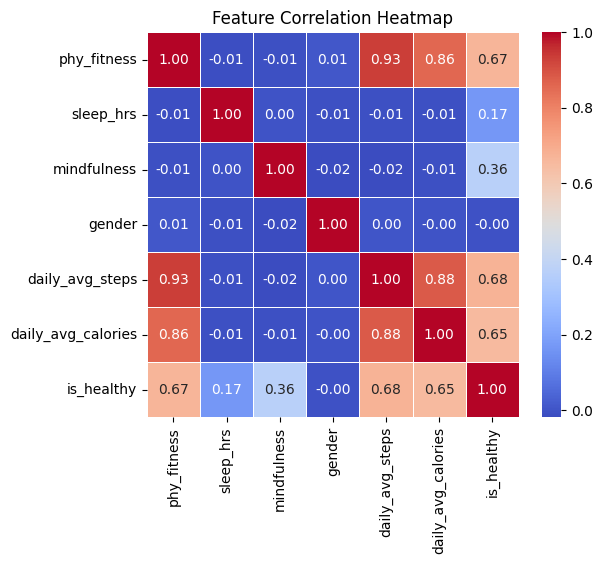

In [6]:
plt.figure(figsize=(6, 5))

# Select only numerical columns for correlation
numeric_df = df.select_dtypes(include=['number'])

# Compute correlation only on numeric data
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")

plt.show()


**3. Histogram of Features**
To visualize the distribution of physical fitness and mindfulness scores:

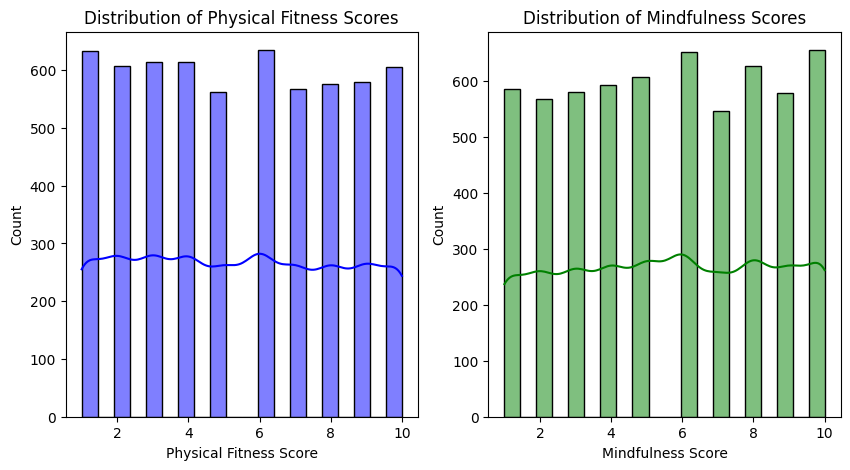

In [7]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['phy_fitness'], bins=20, kde=True, color='blue')
plt.xlabel("Physical Fitness Score")
plt.title("Distribution of Physical Fitness Scores")

plt.subplot(1, 2, 2)
sns.histplot(df['mindfulness'], bins=20, kde=True, color='green')
plt.xlabel("Mindfulness Score")
plt.title("Distribution of Mindfulness Scores")

plt.show()


**4. Box Plot (To detect outliers)**
To visualize outliers in features:

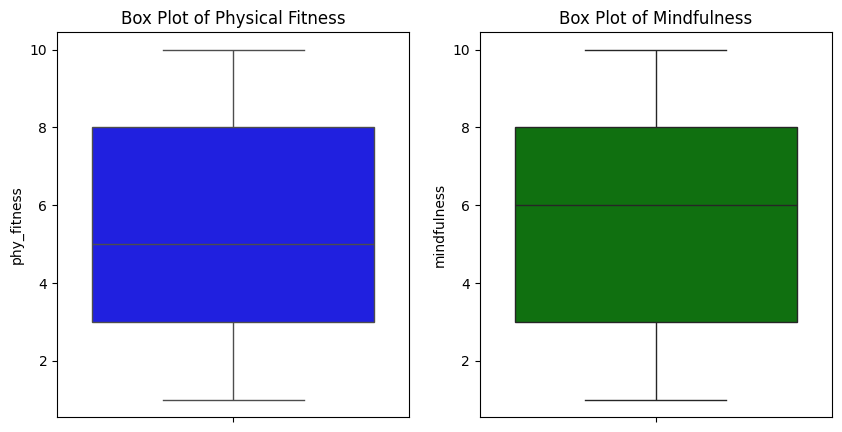

In [8]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.boxplot(y=df["phy_fitness"], color="blue")
plt.title("Box Plot of Physical Fitness")

plt.subplot(1, 2, 2)
sns.boxplot(y=df["mindfulness"], color="green")
plt.title("Box Plot of Mindfulness")

plt.show()


**5. Model Performance Comparison (Bar Chart)**
To compare SVM and Random Forest model accuracy:

<ipython-input-9-91fa052b187f>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracy_scores, palette="viridis")


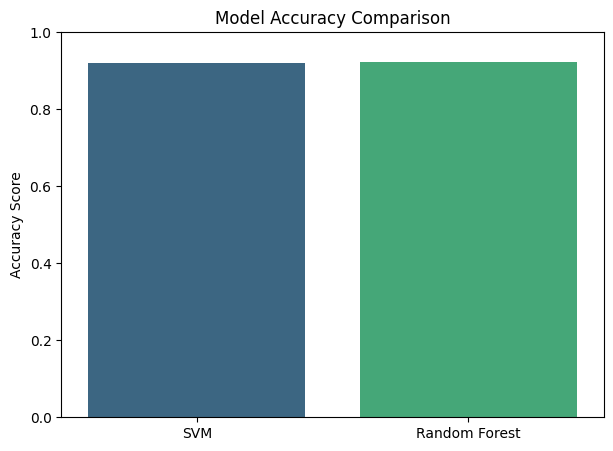

In [9]:
models = ['SVM', 'Random Forest']
accuracy_scores = [svm_acc, rf_acc]

plt.figure(figsize=(7, 5))
sns.barplot(x=models, y=accuracy_scores, palette="viridis")
plt.ylabel("Accuracy Score")
plt.ylim(0, 1)
plt.title("Model Accuracy Comparison")
plt.show()


**6. Confusion Matrix (For Model Evaluation)**
To analyze model misclassifications:

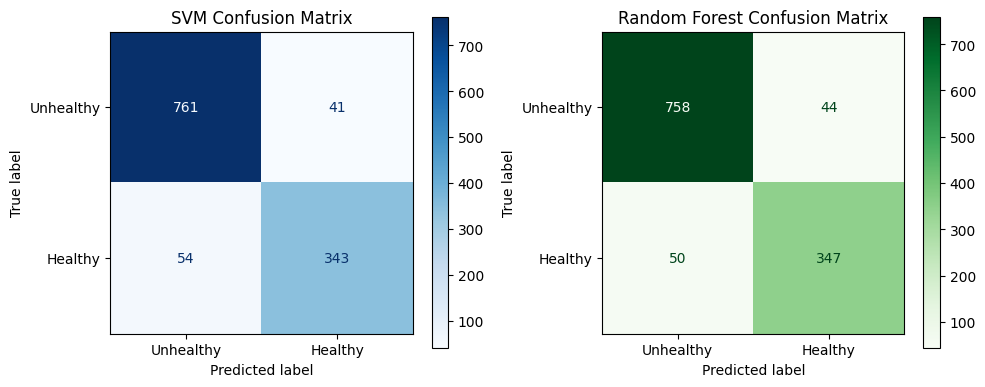

In [10]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Compute confusion matrices
cm_svm = confusion_matrix(y_test, svm_preds)
cm_rf = confusion_matrix(y_test, rf_preds)

# Create figure and axes
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Plot SVM Confusion Matrix
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=['Unhealthy', 'Healthy'])
disp_svm.plot(cmap="Blues", ax=axes[0])
axes[0].set_title("SVM Confusion Matrix")

# Plot Random Forest Confusion Matrix
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=['Unhealthy', 'Healthy'])
disp_rf.plot(cmap="Greens", ax=axes[1])
axes[1].set_title("Random Forest Confusion Matrix")

# Adjust layout
plt.tight_layout()
plt.show()


**1. Hyperparameter Tuning (SVM & Random Forest)**
✅ Grid Search for SVM

In [11]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
grid_svm = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')
grid_svm.fit(X_train, y_train)

print("Best parameters for SVM:", grid_svm.best_params_)
print("Best SVM Accuracy:", grid_svm.best_score_)


Best parameters for SVM: {'C': 10, 'kernel': 'rbf'}
Best SVM Accuracy: 0.9295529197080292


✅ Grid Search for Random Forest

In [12]:
param_grid_rf = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}
grid_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5, scoring='accuracy')
grid_rf.fit(X_train, y_train)

print("Best parameters for Random Forest:", grid_rf.best_params_)
print("Best RF Accuracy:", grid_rf.best_score_)


Best parameters for Random Forest: {'max_depth': None, 'n_estimators': 50}
Best RF Accuracy: 0.9287187174139729


** 2. Principal Component Analysis (PCA)**

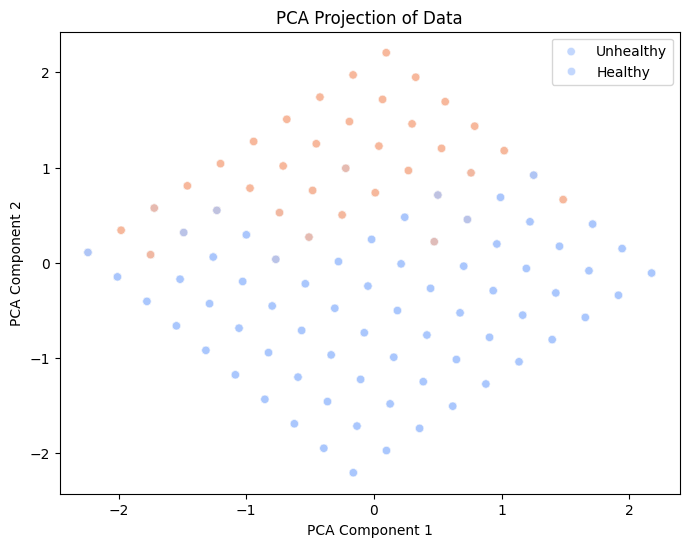

In [13]:
from sklearn.decomposition import PCA

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)

# Visualizing PCA components
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y_train, palette="coolwarm", alpha=0.7)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("PCA Projection of Data")
plt.legend(["Unhealthy", "Healthy"])
plt.show()


** 3. SHAP (Explainable AI - Model Interpretability)**

SHAP Values Shape: (1199, 2, 2)
X_test_df Shape: (1199, 2)


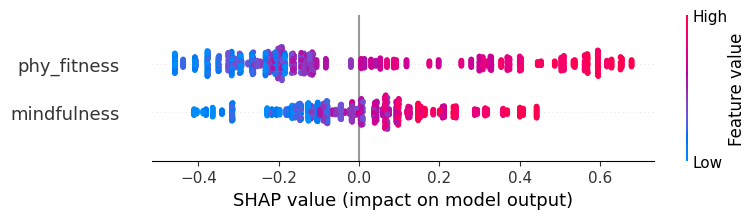

In [14]:
import shap

# Ensure X_train and X_test are DataFrames with correct feature names
X_train_df = pd.DataFrame(X_train, columns=['phy_fitness', 'mindfulness'])
X_test_df = pd.DataFrame(X_test, columns=['phy_fitness', 'mindfulness'])

# Initialize SHAP Explainer using TreeExplainer (best for Random Forest)
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_test_df)  # Get SHAP values

# Ensure SHAP values shape is correct before plotting
print(f"SHAP Values Shape: {np.array(shap_values).shape}")
print(f"X_test_df Shape: {X_test_df.shape}")

# Check if SHAP values is a list (Multi-Class case)
if isinstance(shap_values, list):
    shap_values_corrected = shap_values[1]  # Take class 1 SHAP values
else:
    shap_values_corrected = shap_values  # Binary classification

# Remove extra dimension if present (Fix for shape mismatch)
if len(shap_values_corrected.shape) == 3:
    shap_values_corrected = shap_values_corrected[:, :, 1]  # Select relevant class values

# Summary Plot
shap.summary_plot(shap_values_corrected, X_test_df)


** 4. K-Means Clustering (For Data Segmentation)**

NaN values before imputation:
phy_fitness    3
mindfulness    0
dtype: int64
NaN values after imputation:
phy_fitness    0
mindfulness    0
dtype: int64


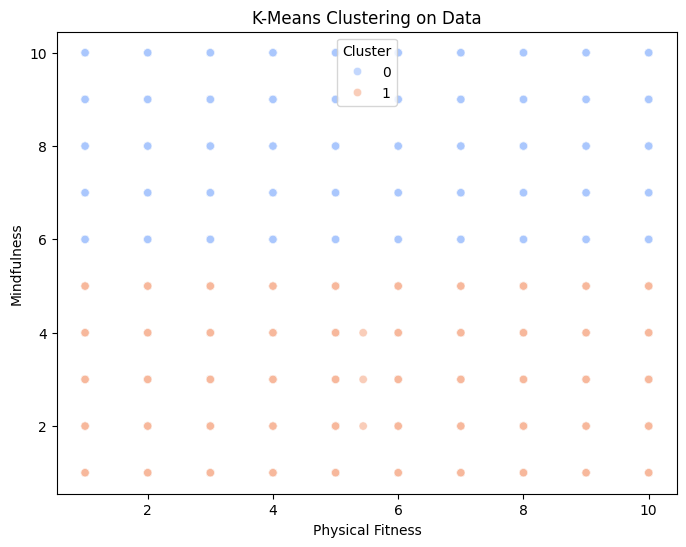

In [15]:
# Importing Libraries
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Data (Replace with your data source)
# Example: df = pd.read_csv('your_data.csv')
# Ensure 'phy_fitness' and 'mindfulness' are present in the DataFrame

# Checking for NaN values
print("NaN values before imputation:")
print(df[['phy_fitness', 'mindfulness']].isna().sum())

# Handling NaN values using mean imputation
imputer = SimpleImputer(strategy='mean')
df[['phy_fitness', 'mindfulness']] = imputer.fit_transform(df[['phy_fitness', 'mindfulness']])

# Verifying NaN values are handled
print("NaN values after imputation:")
print(df[['phy_fitness', 'mindfulness']].isna().sum())

# Applying K-Means
kmeans = KMeans(n_clusters=2, random_state=42)
df['Cluster'] = kmeans.fit_predict(df[['phy_fitness', 'mindfulness']])

# Visualizing Clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['phy_fitness'], y=df['mindfulness'], hue=df['Cluster'], palette="coolwarm", alpha=0.7)
plt.xlabel("Physical Fitness")
plt.ylabel("Mindfulness")
plt.title("K-Means Clustering on Data")
plt.legend(title="Cluster")
plt.show()


**🔹 1. Data Augmentation (Synthetic Data Generation)**

In [16]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

print("Before SMOTE:", X_train.shape)
print("After SMOTE:", X_resampled.shape)


Before SMOTE: (4798, 2)
After SMOTE: (6608, 2)


**🔹 2. Model Stacking (Ensemble Learning)**

In [17]:
from sklearn.ensemble import StackingClassifier

stacked_model = StackingClassifier(
    estimators=[('svm', svm_model), ('rf', rf_model)],
    final_estimator=RandomForestClassifier(n_estimators=50, random_state=42)
)
stacked_model.fit(X_train, y_train)

stacked_preds = stacked_model.predict(X_test)
print("Stacked Model Accuracy:", accuracy_score(y_test, stacked_preds))


Stacked Model Accuracy: 0.9232693911592994


**🔹 3. AutoML (Automated Machine Learning)**

In [18]:
!pip install tpot
!pip install --upgrade scikit-learn numpy
!pip install tpot

from tpot import TPOTClassifier

tpot = TPOTClassifier(generations=5, population_size=20, verbosity=2, random_state=42)
tpot.fit(X_train, y_train)

print("Best Model Found by TPOT:", tpot.fitted_pipeline_)


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.4/87.4 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 6.3 MB/s eta 0:00:00
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11939 sha256=ef361249ebf7c3f45c2017d47d5c1b9743c93140a1475b34549d5fb0f1536bba
  Stored in directory: /root/.cache/pip/wheels/da/77/2d/adbc56bc4db95ad80c6d4e71cd69e2d9d122174904342e3f7f
Successfully built stopit
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 96.0 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba 0.61.0 requires numpy<2.2,>

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1230: FutureWarning: passing a class to None is deprecated and will be removed in 1.8. Use an instance of the class instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1270: FutureWarning: passing a class to None is deprecated and will be removed in 1.8. Use an instance of the class instead.
  warnings.warn(


is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_classifier
is_classifier
is_classifier
is_classifier
is_classifier
is_classifier
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_classifier
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier


Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.9305956725755996

Generation 2 - Current best internal CV score: 0.9305956725755996

Generation 3 - Current best internal CV score: 0.9305956725755996

Generation 4 - Current best internal CV score: 0.9305956725755996

Generation 5 - Current best internal CV score: 0.9305956725755996

Best pipeline: ExtraTreesClassifier(input_matrix, bootstrap=True, criterion=entropy, max_features=0.8, min_samples_leaf=19, min_samples_split=5, n_estimators=100)
Best Model Found by TPOT: Pipeline(steps=[('extratreesclassifier',
                 ExtraTreesClassifier(bootstrap=True, criterion='entropy',
                                      max_features=0.8, min_samples_leaf=19,
                                      min_samples_split=5, random_state=42))])


**🔹 4. Deep Learning (Neural Network Model)**

In [19]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define Neural Network Model
model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile & Train Model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=20, batch_size=16, validation_data=(X_test, y_test))

# Evaluate Model
nn_preds = (model.predict(X_test) > 0.5).astype(int)
print("Neural Network Accuracy:", accuracy_score(y_test, nn_preds))


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


300/300 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8602 - loss: 0.4361 - val_accuracy: 0.8966 - val_loss: 0.2143
Epoch 2/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9088 - loss: 0.1939 - val_accuracy: 0.9208 - val_loss: 0.1796
Epoch 3/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9238 - loss: 0.1638 - val_accuracy: 0.9208 - val_loss: 0.1707
Epoch 4/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9228 - loss: 0.1624 - val_accuracy: 0.9208 - val_loss: 0.1640
Epoch 5/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9257 - loss: 0.1604 - val_accuracy: 0.9208 - val_loss: 0.1628
Epoch 6/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9227 - loss: 0.1554 - val_accuracy: 0.9208 - val_loss: 0.1669
Epoch 7/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9237 - loss: 0.1561 - val_accuracy: 0.9208 - val_loss: 0.1605
Epoch 8/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9218 - loss: 0.1578 - val_accuracy: 0.9208 - val_

**🔹 5. Time Series Forecasting (If Your Data is Time-Based)**

In [20]:
import pandas as pd

# Generate a synthetic date column (assuming dataset has 6000 rows)
df['date'] = pd.date_range(start='2023-01-01', periods=len(df), freq='D')
df.sort_values(by='date', inplace=True)

print(df[['date', 'daily_avg_steps', 'daily_avg_calories', 'is_healthy']].head())


        date  daily_avg_steps  daily_avg_calories  is_healthy
0 2023-01-01           2020.0              1831.0           0
1 2023-01-02           5154.0              2190.0           0
2 2023-01-03          12363.0              2297.0           1
3 2023-01-04           1664.0              1943.0           0
4 2023-01-05          17680.0              3527.0           1


**🔹 6. Model Deployment (Streamlit Web App)**

In [26]:
import pandas as pd
import pickle
from sklearn.preprocessing import StandardScaler

# Load dataset
df = pd.read_csv("dataset.csv")

# Print available columns
print("Available Columns:", df.columns.tolist())

# Define correct numerical columns (Check column names before using)
numerical_cols = ["phy_fitness", "mindfulness", "sleep_hrs"]  # Removed 'daily_steps'

# Train scaler on available numerical features
scaler = StandardScaler()
scaler.fit(df[numerical_cols])

# Save the updated scaler
pickle.dump(scaler, open("scaler.pkl", "wb"))
print("Scaler saved successfully!")


Available Columns: ['phy_fitness', 'diet_pref', 'act_level', 'sleep_hrs', 'mindfulness', 'career', 'gender', 'daily_avg_steps', 'daily_avg_calories', 'is_healthy']
Scaler saved successfully!


In [21]:
import pandas as pd
import numpy as np
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

# Load dataset
df = pd.read_csv("dataset.csv")

# Select features and target
X = df[['phy_fitness', 'mindfulness']]
y = df['is_healthy']

# Split dataset (80%-20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Save model and scaler
with open("rf_model.pkl", "wb") as model_file:
    pickle.dump(rf_model, model_file)

with open("scaler.pkl", "wb") as scaler_file:
    pickle.dump(scaler, scaler_file)

print("Model and Scaler saved successfully!")


Model and Scaler saved successfully!


In [22]:
%%writefile app.py
import streamlit as st
import pickle
import numpy as np

# Load trained model and scaler
model = pickle.load(open("rf_model.pkl", "rb"))
scaler = pickle.load(open("scaler.pkl", "rb"))

# Streamlit UI
st.title("Health Prediction Web App 🏋️‍♂️💡")

# User Inputs
phy_fitness = st.slider("Physical Fitness (1-10)", 1, 10, 5)
mindfulness = st.slider("Mindfulness Level (1-10)", 1, 10, 5)

# Predict button
if st.button("Predict"):
    # Scale input features
    input_features = scaler.transform([[phy_fitness, mindfulness]])

    # Make prediction
    prediction = model.predict(input_features)

    # Show result
    health_status = "Healthy 🟢" if prediction[0] == 1 else "Unhealthy 🔴"
    st.success(f"Predicted Health Status: {health_status}")


Writing app.py


In [23]:
!pip install pyngrok


In [24]:
!ngrok config add-authtoken 2t286QEdLAMG80q7YArIEY6jmMl_3TM2JpAr78PVrRDhyb9f5


Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [25]:
from pyngrok import ngrok

# Ngrok tunnel start karein (Correct format)
public_url = ngrok.connect("http://localhost:8501")
print("Open this URL in browser:", public_url)

# Run Streamlit App
!streamlit run app.py & sleep 3


Open this URL in browser: NgrokTunnel: "https://a492-34-57-42-39.ngrok-free.app" -> "http://localhost:8501"



  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.57.42.39:8501

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was f

  Stopping...
